In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column

from astropy.io import ascii
import glob, re

from scipy.ndimage.filters import gaussian_filter1d

% matplotlib inline

import matplotlib as mpl
mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=20               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams["font.family"] = "Times New Roman"

from matplotlib import rc

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [2]:
ls ../data/HD_181778/

HD_181778_smear_combined.even.clip.fft  HD_181778_smear_combined.odd.clip.fft
HD_181778_smear_combined.even.clip.ts   HD_181778_smear_combined.odd.clip.ts
HD_181778_smear_combined.full.clip.fft  HD_181778_smear_combined.png
HD_181778_smear_combined.full.clip.ts   HD_181778_smear_combined.zoomin.png


In [3]:
fname_even = "../data/HD_181778/HD_181778_smear_combined.even.clip.fft"
fname_odd = "../data/HD_181778/HD_181778_smear_combined.odd.clip.fft"


In [4]:
even = Table.read(fname_even,format='ascii')
odd = Table.read(fname_odd,format='ascii')


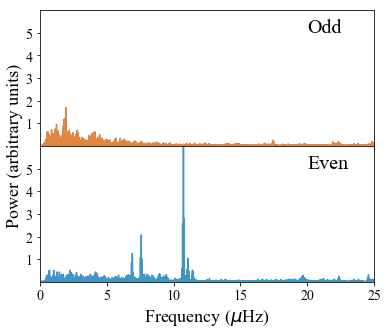

In [5]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6.0,5.0),sharex=True,sharey=True)

ax1.plot(odd['fre'],odd['power']/1e6,label='Odd',alpha=0.75,color=colours[2])
ax2.plot(even['fre'],even['power']/1e6,label='Even',alpha=0.75)
ax1.text(20,5,'Odd',fontsize=20)
ax1.set_yticks(np.arange(5)+1.)
ax2.text(20,5,'Even',fontsize=20)

plt.xlim(0,25)
plt.ylim(0,6)
plt.xlabel(r'Frequency ($\mu$Hz)')
# plt.ylabel('Power (arbitrary units)')
f.text(0.05,0.7,'Power (arbitrary units)',rotation='vertical',fontsize=18)
# ax1.set_title("Even and Odd Quarters of HD 181778",y=1.01,fontsize=18)
# plt.legend(fontsize=20)
f.subplots_adjust(hspace=0)
plt.savefig('../paper/contam_HD_181778.png',bbox_inches='tight')
plt.savefig('../paper/contam_HD_181778.pdf',bbox_inches='tight')

In [6]:
total_pix = 1024*2200*2*42

In [7]:
lc_pix = 170000*32
sc_pix = 512*85
obs_pix = lc_pix+sc_pix

In [8]:
obs_frac = obs_pix/(1.0*total_pix)
print(obs_frac)

0.028977272727272727


In [9]:
5.4e6/95.e6

0.056842105263157895

### Now do it for all the stars, finding the overlap integral

In [10]:
fnames_even = glob.glob('../data/PowerSpectra/*even*')
fnames_odd = glob.glob('../data/PowerSpectra/*odd*')

In [11]:
fnames_odd[0]

'../data/PowerSpectra/HD_180475_smear_combined.odd.clip.fft'

In [12]:

def plot_contam(odd,even,starname,fname_out):
    f, (ax1, ax2) = plt.subplots(2,1,figsize=(7.0,14.0),sharex=True,sharey=True)

    ax1.plot(odd['fre'],odd['power']/1e6,label='Odd',alpha=0.75,color=colours[2])
    ax2.plot(even['fre'],even['power']/1e6,label='Even',alpha=0.75)

    plt.xlim(0,np.max(odd['fre']))
    plt.ylim(0,np.max([np.max(even['power']/1.e6),np.max(odd['power']/1.e6)]))
    plt.xlabel(r'Frequency ($\mu$Hz)')
    plt.ylabel('Power (arbitrary units)')
    ax1.set_title("Even and Odd Quarters of %s" % starname,y=1.01,fontsize=18)
    # plt.legend(fontsize=20)
    f.subplots_adjust(hspace=0)
    plt.savefig(fname_out,bbox_inches='tight')

BD+43_3064 is bad!
HD_181597 is bad!
V543_Lyr is bad!
HD_180658 is bad!
HD_175841 is bad!
HD_185524 is bad!
HD_175740 is bad!
HD_181778 is bad!
HD_188875 is bad!
HD_183383 is bad!
V398_Lyr is bad!
BD+39_3882 is bad!
HD_182694 is bad!
HD_179959 is bad!
HD_177781 is bad!
BD+47_2825 is bad!
HD_185397 is bad!
HD_183124 is bad!
HD_186255 is bad!
HD_175132 is bad!


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


HD_184565 is bad!
HD_186727 is bad!


<Figure size 432x288 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

<Figure size 504x1008 with 0 Axes>

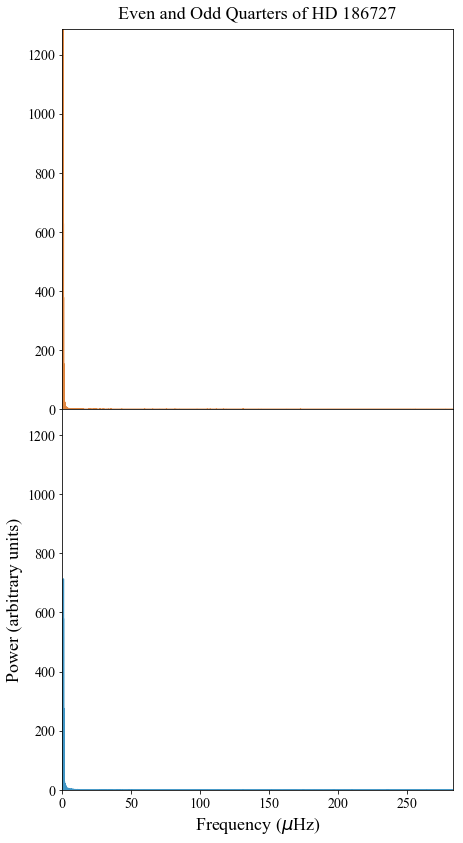

In [13]:
overlaps = []

for j, fname_even in enumerate(fnames_even):
    starname = re.search('PowerSpectra/(.+?)_smear_combined', fname_even).group(1)
    fname_odd = '../data/PowerSpectra/%s_smear_combined.odd.clip.fft' % starname
    even = Table.read(fname_even,format='ascii')
    odd = Table.read(fname_odd,format='ascii')

    norm_even = even['power']
    norm_even = gaussian_filter1d(norm_even,3)
    norm_even /= np.sum(even['power'])

    norm_odd = odd['power']#/np.sum(odd['power'])
    norm_odd = gaussian_filter1d(norm_odd,3)

    norm_odd = np.interp(even['fre'],odd['fre'],norm_odd)
    norm_odd /= norm_odd.sum()
    
    overlap = np.dot(np.sqrt(norm_odd),np.sqrt(norm_even))
    
    overlaps.append(overlap)
    
    if overlap<0.9:
        plt.clf()
        print(starname,'is bad!')
        plot_contam(odd,even,starname.replace('_',' '),'./contam/%s_contam.png' % starname)

In [14]:
fnames_even = glob.glob('../data/*/*.even.clip.fft')

In [15]:
np.sum(np.array(overlaps)<0.9)

22

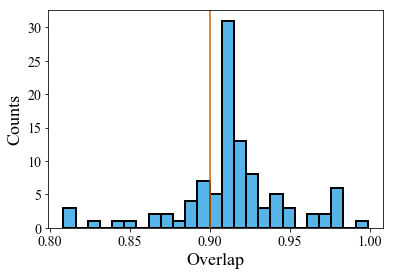

In [23]:
h = plt.hist(overlaps,bins=25,edgecolor='black',linewidth=2,color=colours[5])
plt.axvline(0.9,color=colours[2])
plt.xlabel('Overlap')
plt.ylabel('Counts')
# plt.title('Contamination',y=1.02)
plt.savefig('../paper/contam.pdf',bbox_inches='tight')

Text(0.5, 1.0, 'Contamination in HD 181778 Timeseries')

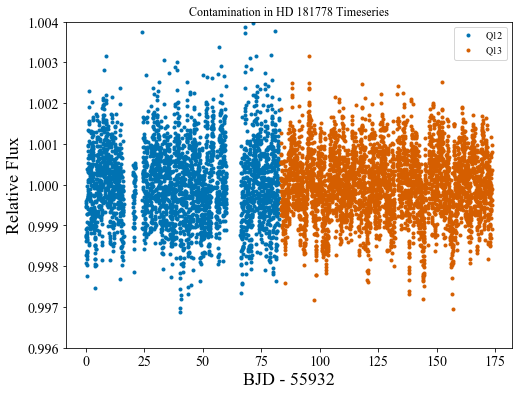

In [17]:
fname_timeseries="../data/lcs/HD_181778_smear_combined.csv"
lc = Table.read(fname_timeseries,format='ascii')

fig = plt.figure(figsize=(8.0,6.0))

q0 = 12
m = lc['QUARTER'] == q0
n = lc['QUARTER'] == q0+1
t0 = np.nanmin(lc[m]['BJD'])

plt.plot(lc[m]['BJD']-t0,lc[m]['FLUX_CORR_8'],'.',label='Q%d' % q0,color=colours[0])
plt.plot(lc[n]['BJD']-t0,lc[n]['FLUX_CORR_8'],'.',label='Q%d' % (q0+1),color=colours[2])
t0 = np.nanmin(lc[m]['BJD'])

plt.ylim(0.996,1.004)
plt.xlabel('BJD - %.0f' % t0)
plt.ylabel('Relative Flux')

plt.legend()
# plt.title('Contamination in HD 181778 Timeseries')

Text(0.5, 1.0, 'Contamination in HD 183383 Timeseries')

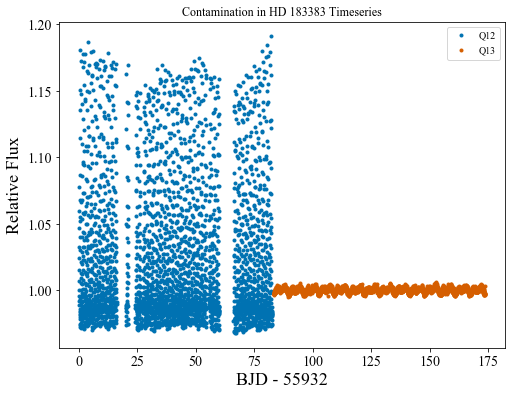

In [18]:
fname_timeseries="../data/lcs/HD_183383_smear_combined.csv"
lc = Table.read(fname_timeseries,format='ascii')

fig = plt.figure(figsize=(8.0,6.0))

# m  = (lc['QUARTER'] %  2) != 0
q0 = 12
m = lc['QUARTER'] == q0
n = lc['QUARTER'] == q0+1
t0 = np.nanmin(lc[m]['BJD'])

plt.plot(lc[m]['BJD']-t0,lc[m]['FLUX_CORR_8'],'.',label='Q%d' % q0,color=colours[0])
plt.plot(lc[n]['BJD']-t0,lc[n]['FLUX_CORR_8'],'.',label='Q%d' % (q0+1),color=colours[2])
# plt.ylim(0.990,1.010)
plt.xlabel('BJD - %.0f' % t0)
plt.ylabel('Relative Flux')

plt.legend()
plt.title('Contamination in HD 183383 Timeseries')

In [19]:
fname_timeseries1="../data/lcs/HD_181778_smear_combined.csv"
lc1 = Table.read(fname_timeseries1,format='ascii')

fname_timeseries2="../data/lcs/HD_183383_smear_combined.csv"
lc2 = Table.read(fname_timeseries2,format='ascii')



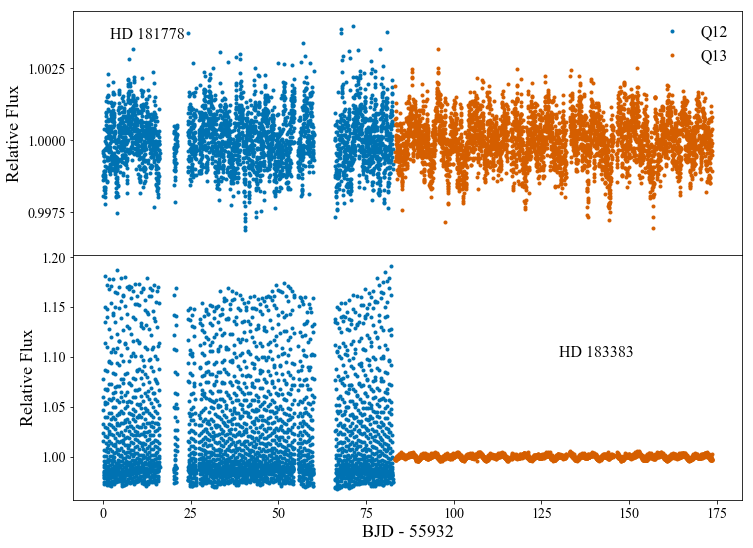

In [22]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(12.0,9.0),sharex=True)
f.subplots_adjust(hspace=0)
ax1.set_yticks([0.9975,1.000,1.0025])


q0 = 12
m = lc1['QUARTER'] == q0
n = lc1['QUARTER'] == q0+1
t0 = np.nanmin(lc1[m]['BJD'])

ax1.plot(lc1[m]['BJD']-t0,lc1[m]['FLUX_CORR_8'],'.',label='Q%d' % q0,color=colours[0])
ax1.plot(lc1[n]['BJD']-t0,lc1[n]['FLUX_CORR_8'],'.',label='Q%d' % (q0+1),color=colours[2])

ax1.text(2,1.0035,'HD 181778',fontsize=16)
ax1.set_ylim(0.996,1.0045)
ax1.set_ylabel('Relative Flux')
# ax1.text(1.01)

ax1.legend(fontsize=16,frameon=False)

ax2.plot(lc2[m]['BJD']-t0,lc2[m]['FLUX_CORR_8'],'.',label='Q%d' % q0,color=colours[0])
ax2.plot(lc2[n]['BJD']-t0,lc2[n]['FLUX_CORR_8'],'.',label='Q%d' % (q0+1),color=colours[2])

ax2.set_xlabel('BJD - %.0f' % t0)
ax2.set_ylabel('Relative Flux')
ax2.text(130,1.1,'HD 183383',fontsize=16)


# ax1.set_title('Contamination in Timeseries')
plt.savefig('../paper/contam_timeseries.png',bbox_inches='tight')
plt.savefig('../paper/contam_timeseries.pdf',bbox_inches='tight')
